# Определение перспективного тарифа для телеком-компании

Провести **АНАЛИЗ** тарифов на выборке клиентов из 500 пользователей федерального оператора сотовой связи. Данные предоставлены за 2018г..

**ТАРИФЫ:**
* Тариф «Смарт»
1.	Ежемесячная плата: 550 рублей
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

* Тариф «Ультра»
1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

Сделать **ВЫВОД**:

> какой тариф приносит больше денег


## Предподготовка

In [1]:
# импортируем библиотеки и делаем настройки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
pd.set_option('display.max_columns', None)

In [2]:
# импортируем таблицы
df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

In [3]:
# изучаем структуру и содержание таблиц
df_calls.info()
display(df_calls.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
21808,1057_257,2018-05-23,4.35,1057
141525,1359_484,2018-09-16,12.23,1359
86617,1217_482,2018-05-16,18.54,1217
47585,1118_874,2018-09-18,10.12,1118
13806,1035_493,2018-05-31,8.16,1035


In [4]:
df_internet.info()
display(df_internet.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
87181,87181,1295_25,408.99,2018-12-13,1295
23389,23389,1078_306,568.29,2018-11-24,1078
96496,96496,1325_155,541.54,2018-08-18,1325
64974,64974,1221_87,616.44,2018-10-20,1221
86345,86345,1292_461,0.00,2018-05-08,1292


In [5]:
df_messages.info()
display(df_messages.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
108749,1436_243,2018-07-07,1436
99218,1404_358,2018-07-23,1404
76128,1323_131,2018-12-31,1323
45387,1196_837,2018-11-12,1196
95489,1393_63,2018-08-06,1393


In [6]:
df_tariffs.info()
display(df_tariffs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [7]:
df_users.info()
display(df_users.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
425,1425,51,NaN,Пермь,Вадим,Фомин,2018-02-27,smart
60,1060,46,NaN,Калуга,Яков,Рудаков,2018-11-24,ultra
156,1156,63,NaN,Набережные Челны,Валерий,Галкин,2018-11-12,ultra
82,1082,48,NaN,Москва,Авксентий,Малышев,2018-10-05,smart
16,1016,58,NaN,Омск,Марица,Сазонова,2018-11-21,ultra


### Выводы

* Исходные данные представлены в 5 разных таблицах.
* Таблицы содержат разное количество строк.
* Пропуски содержит только таблица *df_users* в колонке *churn_date*, есть запись по 38 строкам из 500, что означает - 38 клиентов из 500 прервали контракт с оператором за наблюдаемые 12 месяцев 2018 года. Оставшиеся 462 клиента продолжили сотрудничество. Не имеет смысла заполняит эти пропуски какими-либо данными.
* Ключем объединения послужит *user_id*.
* В 4 таблицах присутствуют колонки с датами, которые имеют тип данных *object*.
* Названия колонок записаны в единообразном формате.
* Названия городов, имена и фамилии записаны единообразно.

## Подготовка данных

In [8]:
# приводим данные о датах в исходных таблицах к типу 'datetime64'
for df in [df_calls, df_internet, df_messages]:
           for column in df:
            if 'date' in column:
                df[column]=pd.to_datetime(df[column], yearfirst=True)
                display(df.dtypes)

id                   object
call_date    datetime64[ns]
duration            float64
user_id               int64
dtype: object

Unnamed: 0               int64
id                      object
mb_used                float64
session_date    datetime64[ns]
user_id                  int64
dtype: object

id                      object
message_date    datetime64[ns]
user_id                  int64
dtype: object

In [9]:
# в таблицу df_calls добавляем колонку с округленным значением минут (округление в большую сторону до целого числа)
df_calls['duration_rounded'] = np.ceil(df_calls['duration'])
display(df_calls.sample(2))


,id,call_date,duration,user_id,duration_rounded
47121,1118_410,2018-07-14,0.0,1118,0.0
107302,1277_81,2018-09-26,0.0,1277,0.0


In [10]:
# проверяем год оказания услуги в таблицах df_calls, df_internet, df_messages
for df in [df_calls, df_internet, df_messages]:
           for column in df:
            if 'date' in column:
                df['year'] = df[column].astype('datetime64[Y]')
                display(df_calls['year'].value_counts())

2018-01-01    202607
Name: year, dtype: int64

2018-01-01    202607
Name: year, dtype: int64

2018-01-01    202607
Name: year, dtype: int64

In [11]:
# добавляем колонки с месяцем в таблицы df_calls, df_internet, df_messages
for df in [df_calls, df_internet, df_messages]:
           for column in df:
            if 'date' in column:
                df['month'] = df[column]=pd.DatetimeIndex(df[column]).month

display(df_internet.sample(2))
display(df_internet.dtypes)


,Unnamed: 0,id,mb_used,session_date,user_id,year,month
70293,70293,1239_314,817.85,9,1239,2018-01-01,9
11868,11868,1041_90,67.52,12,1041,2018-01-01,12


Unnamed: 0               int64
id                      object
mb_used                float64
session_date             int64
user_id                  int64
year            datetime64[ns]
month                    int64
dtype: object

In [12]:
# сводим биллинговые данные в таблицах df_calls, df_internet, df_messages по месяцам и id клиента,
# в таблицах df_calls_pvt_cnt и df_messages_pvt переименовываем колонку id
df_calls_pvt_min = df_calls.pivot_table(index = ['user_id', 'month'], values = 'duration_rounded', aggfunc='sum')
df_calls_pvt_min = df_calls_pvt_min.reset_index()
display(df_calls_pvt_min.head(2))
print()

df_calls_pvt_cnt = df_calls.pivot_table(index = ['user_id', 'month'], values = 'id', aggfunc='count')
df_calls_pvt_cnt = df_calls_pvt_cnt.rename(columns={'id':'calls_cnt'})
df_calls_pvt_cnt = df_calls_pvt_cnt.reset_index()
display(df_calls_pvt_cnt.head(2))
print()

df_internet_pvt = df_internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc='sum')
df_internet_pvt = df_internet_pvt.reset_index()
display(df_internet_pvt.sample(2))
print()
 
df_messages_pvt = df_messages.pivot_table(index = ['user_id', 'month'], values = 'id', aggfunc='count')
df_messages_pvt = df_messages_pvt.rename(columns={'id':'msg_cnt'})
df_messages_pvt = df_messages_pvt.reset_index()
display(df_messages_pvt.sample(2))

,user_id,month,duration_rounded
0,1000,5,159.0
1,1000,6,172.0


,user_id,month,calls_cnt
0,1000,5,22
1,1000,6,43


,user_id,month,mb_used
660,1104,6,13022.89
1645,1261,10,1844.50


,user_id,month,msg_cnt
399,1072,8,24
74,1012,7,12


In [13]:
# в таблице df_tariffs переименовываем колонку tariff_name
df_tariffs = df_tariffs.rename(columns={'tariff_name':'tariff'})
display(df_tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [14]:
# в таблице df_internet_pvt округляем Мб до Гб (в большую сторону до целого числа),
# переименовываем колонку mb_used
df_internet_pvt['mb_used'] = df_internet_pvt['mb_used']/ 1024
df_internet_pvt['mb_used'] = np.ceil(df_internet_pvt['mb_used'])
df_internet_pvt = df_internet_pvt.rename(columns={'mb_used':'gb_used'})
display(df_internet_pvt.sample(2))

,user_id,month,gb_used
481,1076,10,21.0
1814,1287,12,23.0


In [15]:
# объединяем таблицы с биллинговыми данными
df = (
    pd.merge(df_calls_pvt_min, df_calls_pvt_cnt, on = ['user_id', 'month'], how = 'outer')
    .merge(df_internet_pvt, on = ['user_id', 'month'], how = 'outer')
    .merge(df_messages_pvt, on = ['user_id', 'month'], how = 'outer')
)
# объединяем таблицу с информацией о клиентах с биллинговыми данными
df = df_users.merge(df, on = ['user_id'], how = 'outer')

# добавляем в таблицу информацию о тарифах
df = df.merge(df_tariffs, on = ['tariff'], how = 'outer')
       
df=df.reset_index()
df=df.drop('index', 1)
display(df.sample(5))
display(df.dtypes)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,duration_rounded,calls_cnt,gb_used,msg_cnt,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
1058,1012,38,NaN,Санкт-Петербург,Варлам,Соловьев,2018-03-28,smart,8.0,157.0,30.0,22.0,23.0,50,15360,500,550,200,3,3
1445,1102,28,NaN,Москва,Марта,Королькова,2018-06-16,smart,10.0,540.0,70.0,19.0,31.0,50,15360,500,550,200,3,3
595,1331,26,NaN,Москва,Юлия,Малинина,2018-04-12,ultra,9.0,459.0,65.0,33.0,72.0,1000,30720,3000,1950,150,1,1
930,1466,37,NaN,Новосибирск,Рубен,Шевцов,2018-02-28,ultra,9.0,482.0,63.0,13.0,NaN,1000,30720,3000,1950,150,1,1
125,1081,42,NaN,Москва,Софья,Терехова,2018-03-25,ultra,9.0,519.0,74.0,14.0,27.0,1000,30720,3000,1950,150,1,1


user_id                    int64
age                        int64
churn_date                object
city                      object
first_name                object
last_name                 object
reg_date                  object
tariff                    object
month                    float64
duration_rounded         float64
calls_cnt                float64
gb_used                  float64
msg_cnt                  float64
messages_included          int64
mb_per_month_included      int64
minutes_included           int64
rub_monthly_fee            int64
rub_per_gb                 int64
rub_per_message            int64
rub_per_minute             int64
dtype: object

In [16]:
# приводим данные типа float к типу Int64
for column in ['month', 'duration_rounded', 'calls_cnt', 'gb_used', 'msg_cnt']:
    df[column] = df[column].astype('Int64')
display(df.dtypes)

user_id                   int64
age                       int64
churn_date               object
city                     object
first_name               object
last_name                object
reg_date                 object
tariff                   object
month                     Int64
duration_rounded          Int64
calls_cnt                 Int64
gb_used                   Int64
msg_cnt                   Int64
messages_included         int64
mb_per_month_included     int64
minutes_included          int64
rub_monthly_fee           int64
rub_per_gb                int64
rub_per_message           int64
rub_per_minute            int64
dtype: object

In [17]:
# рассчитываем помесячную выручку с каждого клиента по каждой услуге тарифного плана,
# добавляем колонки rev_calls, rev_int, rev_msg
df['rev_calls'] = (df['duration_rounded'] - df['minutes_included']) * df['rub_per_minute']
df.loc[(df.rev_calls <= 0), 'rev_calls'] = 0
display(df['rev_calls'].describe())

df['rev_int'] = (df['gb_used'] - df['mb_per_month_included'] / 1024) * df['rub_per_gb']
df.loc[(df.rev_int <= 0), 'rev_int'] = 0
display(df['rev_int'].describe())

df['rev_msg'] = (df['msg_cnt'] - df['messages_included']) * df['rub_per_message']
df.loc[(df.rev_msg <= 0), 'rev_msg'] = 0
display(df['rev_msg'].describe())

display(df.sample(5))

count    3174.000000
mean       87.655009
std       220.392141
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      2805.000000
Name: rev_calls, dtype: float64

count    3203.000000
mean      452.934749
std       684.799130
min         0.000000
25%         0.000000
50%         0.000000
75%       800.000000
max      4600.000000
Name: rev_int, dtype: float64

count    2717.000000
mean       14.274568
std        37.131078
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       279.000000
Name: rev_msg, dtype: float64

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,duration_rounded,calls_cnt,gb_used,msg_cnt,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,rev_calls,rev_int,rev_msg
5,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,10,350,57,15,73,1000,30720,3000,1950,150,1,1,0,0.0,0
2256,1280,53,NaN,Астрахань,Артемий,Худяков,2018-07-18,smart,8,779,99,16,42,50,15360,500,550,200,3,3,837,200.0,0
2811,1414,70,NaN,Владимир,Александра,Лобанова,2018-05-05,smart,6,338,51,18,52,50,15360,500,550,200,3,3,0,600.0,6
1692,1155,71,NaN,Ставрополь,Александр,Чернов,2018-01-02,smart,8,265,39,19,52,50,15360,500,550,200,3,3,0,800.0,6
33,1018,71,NaN,Уфа,Матвей,Золотов,2018-04-01,ultra,12,839,110,6,37,1000,30720,3000,1950,150,1,1,0,0.0,0


In [18]:
# создаем функцию и рассчитываем помесячную выручку с каждого клиента, включая абонентскую плату
# добавляем колонку revenue со значением общей выручки
def rev_calc(row):
    mnth_rev_calls = row['duration_rounded'] - row['minutes_included']
    mnth_rev_int = row['gb_used'] - row['mb_per_month_included'] / 1024
    mnth_rev_msg = row['msg_cnt'] - row['messages_included']
    profit = row['rub_monthly_fee']
    if mnth_rev_calls > 0:
        profit += mnth_rev_calls * row['rub_per_minute']
    if mnth_rev_int > 0:
        profit += mnth_rev_int * row['rub_per_gb']
    if mnth_rev_msg > 0:
        profit += mnth_rev_msg * row['rub_per_message']
    return profit
df['revenue'] = df.apply(rev_calc, axis = 1)
df['revenue'] = df['revenue'].astype('int64')
display(df.dtypes)
display(df.sample(5))
display(df['revenue'].describe())


user_id                    int64
age                        int64
churn_date                object
city                      object
first_name                object
last_name                 object
reg_date                  object
tariff                    object
month                      Int64
duration_rounded           Int64
calls_cnt                  Int64
gb_used                    Int64
msg_cnt                    Int64
messages_included          int64
mb_per_month_included      int64
minutes_included           int64
rub_monthly_fee            int64
rub_per_gb                 int64
rub_per_message            int64
rub_per_minute             int64
rev_calls                  Int64
rev_int                  float64
rev_msg                    Int64
revenue                    int64
dtype: object

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,duration_rounded,calls_cnt,gb_used,msg_cnt,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,rev_calls,rev_int,rev_msg,revenue
2994,1454,29,NaN,Томск,Адам,Алешин,2018-03-08,smart,3,409,60,10,20,50,15360,500,550,200,3,3,0,0.0,0,550
2763,1404,61,NaN,Иркутск,Роберт,Уваров,2018-04-18,smart,6,196,29,17,57,50,15360,500,550,200,3,3,0,400.0,21,971
956,1473,18,NaN,Красноярск,Николай,Лебедев,2018-08-05,ultra,11,NaN,NaN,22,14,1000,30720,3000,1950,150,1,1,NaN,0.0,0,1950
1755,1171,47,NaN,Москва,Каролина,Иванова,2018-03-20,smart,4,694,84,15,64,50,15360,500,550,200,3,3,582,0.0,42,1174
3115,1480,29,2018-09-26,Новокузнецк,Гелена,Емельянова,2018-02-14,smart,4,550,79,16,20,50,15360,500,550,200,3,3,150,200.0,0,900


count    3216.000000
mean     1528.902674
std       798.224060
min       550.000000
25%       750.000000
50%      1653.500000
75%      1950.000000
max      6770.000000
Name: revenue, dtype: float64

In [19]:
# заменяем пропущенные значения на 0 (клиент не пользовался услугой),
# удаляем записи по клиентам, которые не пользовались услугами вообще
df = df.fillna(0)
display(df.isna().sum())
display(df.sample(5))

no_service_cu = df.loc[df['month']==0]
display(no_service_cu)

df = df.drop(index=[243, 2619])
df = df.reset_index()
display(df.iloc[[243, 2619]])


user_id                  0
age                      0
churn_date               0
city                     0
first_name               0
last_name                0
reg_date                 0
tariff                   0
month                    0
duration_rounded         0
calls_cnt                0
gb_used                  0
msg_cnt                  0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
rev_calls                0
rev_int                  0
rev_msg                  0
revenue                  0
dtype: int64

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,duration_rounded,calls_cnt,gb_used,msg_cnt,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,rev_calls,rev_int,rev_msg,revenue
1084,1017,73,0,Краснодар,Мария,Аленникова,2018-05-22,smart,9,366,48,18,0,50,15360,500,550,200,3,3,0,600.0,0,1150
2561,1353,57,2018-11-26,Санкт-Петербург,Доминика,Анищенко,2018-04-22,smart,10,329,50,19,60,50,15360,500,550,200,3,3,0,800.0,30,1380
2660,1376,46,0,Самара,Пётр,Акимов,2018-05-31,smart,12,583,73,15,0,50,15360,500,550,200,3,3,249,0.0,0,799
2381,1307,53,0,Самара,Симона,Авсейкина,2018-05-04,smart,5,558,80,15,26,50,15360,500,550,200,3,3,174,0.0,0,724
2039,1227,66,0,Санкт-Петербург,Раиса,Калинина,2018-01-09,smart,2,602,91,20,27,50,15360,500,550,200,3,3,306,1000.0,0,1856


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,duration_rounded,calls_cnt,gb_used,msg_cnt,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,rev_calls,rev_int,rev_msg,revenue
243,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,0,0,0,0,0,1000,30720,3000,1950,150,1,1,0,0.0,0,1950
2619,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,0,0,0,0,0,50,15360,500,550,200,3,3,0,0.0,0,550


,index,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,duration_rounded,calls_cnt,gb_used,msg_cnt,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,rev_calls,rev_int,rev_msg,revenue
243,244,1143,64,0,Пермь,Арсен,Покровский,2018-04-27,ultra,4,65,10,3,0,1000,30720,3000,1950,150,1,1,0,0.0,0,1950
2619,2621,1372,71,0,Магнитогорск,Лидия,Авраамова,2018-01-23,smart,2,560,62,10,29,50,15360,500,550,200,3,3,180,0.0,0,730


In [20]:
# проверяем таблицу на наличие дубликатов
print('Кол-во дубликатов в таблице:', df.duplicated().sum())

Кол-во дубликатов в таблице: 0


### Выводы

По результатам анализа данных, полученных в процессе предподготовки, произведены следующие преобразования, целью которых являлось подготовить таблицы и осуществить их объединение для дальнейших расчетов, анализа и выводов:

* Данные со значением даты в таблицах *df_calls, df_internet, df_messages* приведены к типу данных *datetime64* с помощью цикла и метода *pd. to_datetime()*.

* В таблицу *df_calls* добавленка колонка *'duration_rounded'* в которой значения количества потраченных минут (звонки) округлены в большую сторону до целого с помощью метода *np.ceil()*.

* В таблицы *df_calls, df_internet, df_messages* добавлена колонка со значением месяца из даты с помощью цикла и метода *pd.DatetimeIndex()*.

* В таблицах *df_calls_pvt_cnt и df_messages_pvt* колонка *id* переименована в колонки *calls_cnt, msg_cnt* с помощью метода *.rename()*.

* В таблице df_tariffs колонка *tariff_name* переименована в колонку *tariff* с помощью метода *.rename()*.

* Биллинговые данные в таблицах *df_calls, df_internet, df_messages* сведены по ключам *id клиента и порядкового номера месяца оказания услуги* с помощью метода *pivot_table()*.

* Данные об израсходованном интернет трафике в таблице *df_internet_pvt* пересчитаны из Мб в Гб с коэффициентом 1024 и округлены в большую сторону до целого с помощью метода *np.ceil()*.

* Последовательно с помощью метода *.merge()* объединены сводные таблицы, содержащие биллинговые данные *df_calls_pvt_min, df_internet_pvt, df_messages_pvt*, с ключами объединения *'user_id', 'month'* и параметром *how = 'outer'*. Полученный массив данных объеденен по ключу *'user_id'* с таблицей *df_users* и далее по ключу *'tariff'* с таблицей *df_tariffs*.

На основе подготовленных и сведенных в единую таблицу данных произведен:

* Расчет помесячной выручки с каждого клиента по каждой услуге тарифного плана.  Добавлены колонки *'rev_calls', 'rev_int', rev_msg'*. Отрицательные значения заменены на *0* с иcпользованием метода *.loc*.
* Расчет суммарной помесячной выручки по всем услугам с каждого клиента, включая абонентскую плату. Для расчета создана функция и применен метод *.apply()*. Добавлена колонка *'revenue'*.

**Пропущенные значения** как значения по услугам, которыми не воспользовался клиент, заменены на *0* методом *.fillna(0)*. 

**Выявлены и удалены 2 записи**, в которых срок жизни клиента составил 5 и 6 дней и клиенты вообще не воспользовались услугами оператора. Использован метод *.drop()*.

**Проверка на дубликаты** проведена с помощью метода *.duplicated*. Дубликаты не обнаружены.


## Анализ данных

In [21]:
# создаем переменные с интересуемыми параметрами сравнения тарифов, сводим данные по месяцам
# (кол-во клиентов, длительность звонков, количество сообщений, объем интернет трафика, кол-во звонков)
df_rev_compar = df.pivot_table(index = ['month'], columns = ['tariff'], values = ['revenue'], aggfunc=('sum'))
df_cu_compar = df.pivot_table(index = ['month'], columns = ['tariff'], values = ['user_id'], aggfunc=('count'))
df_calls_compar = df.pivot_table(index = ['month'], columns = ['tariff'], values = ['duration_rounded'], aggfunc=('sum'))
df_calls_cnt_compar = df.pivot_table(index = ['month'], columns = ['tariff'], values = ['calls_cnt'], aggfunc=('sum'))
df_msg_compar = df.pivot_table(index = ['month'], columns = ['tariff'], values = ['msg_cnt'], aggfunc=('sum'))
df_int_compar = df.pivot_table(index = ['month'], columns = ['tariff'], values = ['gb_used'], aggfunc=('sum'))
 

In [22]:
# объединяем мультииндексы
df_rev_compar.columns = ['_'.join(col).strip() for col in df_rev_compar.columns.values]
df_cu_compar.columns = ['_'.join(col).strip() for col in df_cu_compar.columns.values]
df_calls_compar.columns = ['_'.join(col).strip() for col in df_calls_compar.columns.values]
df_calls_cnt_compar.columns = ['_'.join(col).strip() for col in df_calls_cnt_compar.columns.values]
df_msg_compar.columns = ['_'.join(col).strip() for col in df_msg_compar.columns.values]
df_int_compar.columns = ['_'.join(col).strip() for col in df_int_compar.columns.values]

display(df_rev_compar.dtypes)
display(df_cu_compar.dtypes)
display(df_calls_compar.dtypes)
display(df_calls_cnt_compar.dtypes)
display(df_msg_compar.dtypes)
display(df_int_compar.dtypes)

revenue_smart    int64
revenue_ultra    int64
dtype: object

user_id_smart    int64
user_id_ultra    int64
dtype: object

duration_rounded_smart    object
duration_rounded_ultra    object
dtype: object

calls_cnt_smart    object
calls_cnt_ultra    object
dtype: object

msg_cnt_smart    object
msg_cnt_ultra    object
dtype: object

gb_used_smart    object
gb_used_ultra    object
dtype: object

In [23]:
# приводим значения к типу int64
for column in df_calls_compar:
    df_calls_compar[column] = df_calls_compar[column].astype('int64')
display(df_calls_compar.dtypes)
for column in df_msg_compar:
    df_msg_compar[column] = df_msg_compar[column].astype('int64')
display(df_msg_compar.dtypes)
for column in df_int_compar:
    df_int_compar[column] = df_int_compar[column].astype('int64')
display(df_int_compar.dtypes)
for column in df_calls_cnt_compar:
    df_calls_cnt_compar[column] = df_calls_cnt_compar[column].astype('int64')
display(df_calls_cnt_compar.dtypes)

duration_rounded_smart    int64
duration_rounded_ultra    int64
dtype: object

msg_cnt_smart    int64
msg_cnt_ultra    int64
dtype: object

gb_used_smart    int64
gb_used_ultra    int64
dtype: object

calls_cnt_smart    int64
calls_cnt_ultra    int64
dtype: object

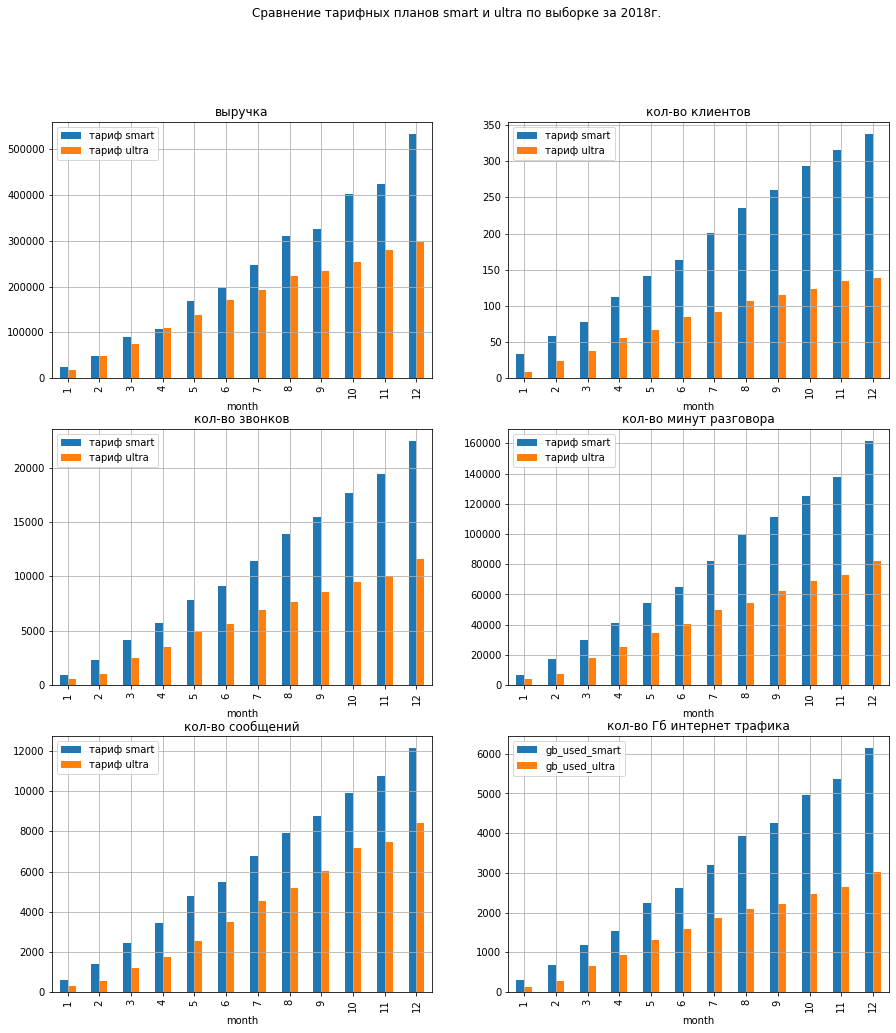

In [24]:
# строим графики по интересуемым параметрам 
fig, axs = plt.subplots(3,2)
fig.set_figheight(16)
fig.set_figwidth(15)
fig.suptitle('Сравнение тарифных планов smart и ultra по выборке за 2018г.')

df_rev_compar.plot.bar(ax=axs[0,0], grid=True, title="выручка")
df_cu_compar.plot.bar(ax=axs[0,1], grid=True, title="кол-во клиентов")
df_calls_cnt_compar.plot.bar(ax=axs[1,0], grid=True, title="кол-во звонков")
df_calls_compar.plot.bar(ax=axs[1,1], grid=True, title="кол-во минут разговора")
df_msg_compar.plot.bar(ax=axs[2,0], grid=True,title="кол-во сообщений")
df_int_compar.plot.bar(ax=axs[2,1], grid=True,title="кол-во Гб интернет трафика")

axs[0][0].legend(['тариф smart', 'тариф ultra'])
axs[0][1].legend(['тариф smart', 'тариф ultra'])
axs[1][0].legend(['тариф smart', 'тариф ultra'])
axs[1][1].legend(['тариф smart', 'тариф ultra'])
axs[2][0].legend(['тариф smart', 'тариф ultra'])
axs[2][0].legend(['тариф smart', 'тариф ultra'])

In [25]:
# считаем среднее колво, дисперсию и стандартное отклонение
# выручки в целом (включая абонентскую плату) и по сервисам (без абонентской платы)
df_revenue_analysis = df.pivot_table(columns = 'tariff', values = ['revenue', 'rev_calls', 'rev_int', 'rev_msg'], aggfunc = ('mean', 'var', 'std'))

# переводим в численные значения
df_revenue_analysis = df_revenue_analysis.apply(pd.to_numeric, errors='coerce')

display(df_revenue_analysis)
display(df_revenue_analysis.dtypes)

tariff                  smart          ultra
rev_calls mean     124.816958       0.000000
          std      254.035718       0.000000
          var    64534.146014       0.000000
rev_int   mean     597.756842     120.152284
          std      736.563904     376.187114
          var   542526.384295  141516.745079
rev_msg   mean      17.399731       0.000000
          std       40.327368       0.000000
          var     1626.296607       0.000000
revenue   mean    1289.973531    2070.152284
          std      818.404367     376.187114
          var   669785.708006  141516.745079

tariff
smart    float64
ultra    float64
dtype: object

### ПАРАМЕТР ВЫРУЧКА

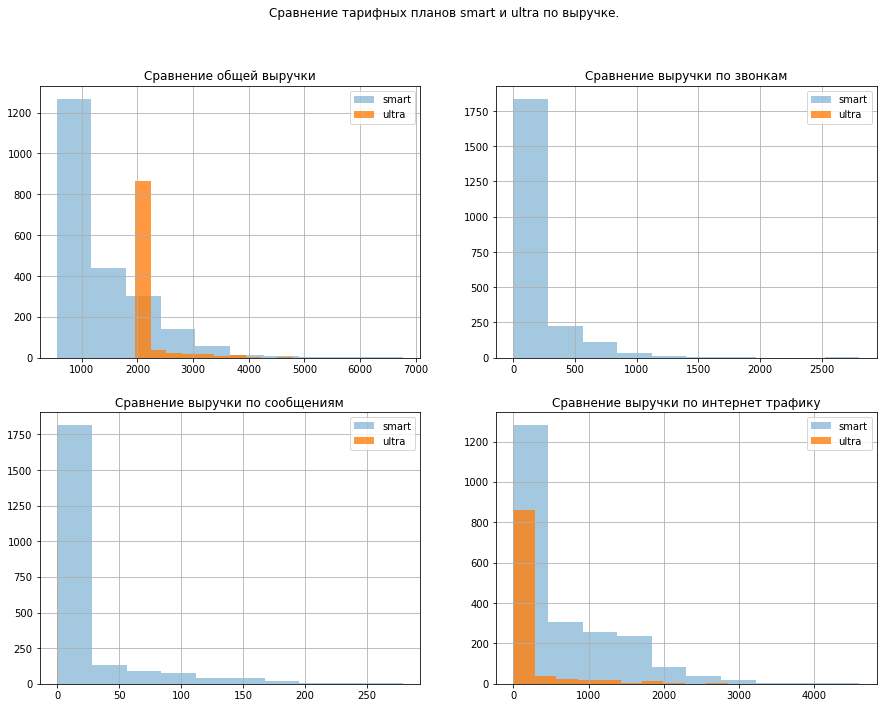

In [26]:
# строим гистограммы по выручке
fig, axs = plt.subplots(2,2)
fig.set_figheight(11)
fig.set_figwidth(15)
fig.suptitle('Сравнение тарифных планов smart и ultra по выручке.')


plt.subplot(221)
plt.title('Сравнение общей выручки')
df.loc[(df['tariff'] == 'smart'), 'revenue'].hist(alpha=0.4)
df.loc[(df['tariff'] == 'ultra'), 'revenue'].hist(alpha=0.8)
plt.legend(labels=['smart', 'ultra'])

plt.subplot(222)
plt.title('Сравнение выручки по звонкам')
df.loc[(df['tariff'] == 'smart'), 'rev_calls'].hist(alpha=0.4)
df.loc[(df['tariff'] == 'ultra'), 'rev_calls'].hist(alpha=0.8)
plt.legend(labels=['smart', 'ultra'])

plt.subplot(223)
plt.title('Сравнение выручки по сообщениям')
df.loc[(df['tariff'] == 'smart'), 'rev_msg'].hist(alpha=0.4)
df.loc[(df['tariff'] == 'ultra'), 'rev_msg'].hist(alpha=0.8)
plt.legend(labels=['smart', 'ultra'])

plt.subplot(224)
plt.title('Сравнение выручки по интернет трафику')
df.loc[(df['tariff'] == 'smart'), 'rev_int'].hist(alpha=0.4)
df.loc[(df['tariff'] == 'ultra'), 'rev_int'].hist(alpha=0.8)
plt.legend(labels=['smart', 'ultra'])

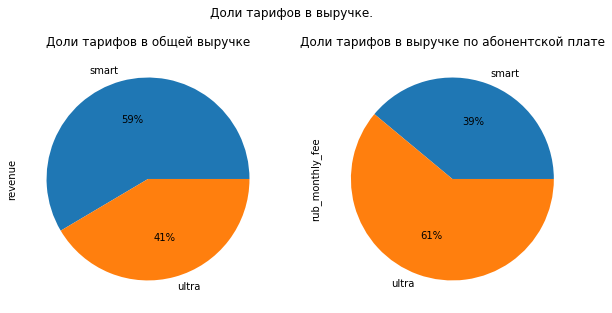

In [27]:
# определяем доли тарифов в общей выручке и в выручке по абонентской плате
fig, axs = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(10)
fig.suptitle('Доли тарифов в выручке.')

plt.subplot(121)
plt.title('Доли тарифов в общей выручке')
df.groupby(['tariff'])['revenue'].sum().plot(kind='pie', autopct='%1.0f%%')

plt.subplot(122)
plt.title('Доли тарифов в выручке по абонентской плате')
df.groupby(['tariff'])['rub_monthly_fee'].sum().plot(kind='pie', autopct='%1.0f%%')


### ПАРАМЕТР ДЛИТЕЛЬНОСТЬ ЗВОНКОВ

Стат значения по звонкам, тариф smart:
 count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: duration_rounded, dtype: float64

Стат значения по звонкам, тариф ultra:
 count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: duration_rounded, dtype: float64


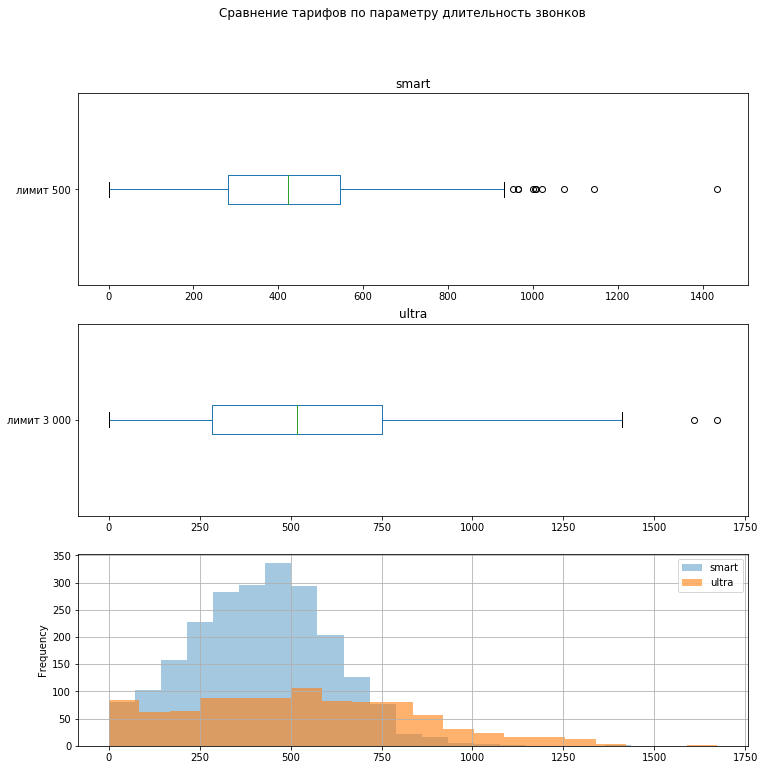

In [28]:
# выводим статистические значения,
# строим диаграммы размаха и гистограммы по параметру длительность звонков
print("Стат значения по звонкам, тариф smart:\n", df.loc[(df['tariff'] == 'smart'), 'duration_rounded'].describe())
print()
print("Стат значения по звонкам, тариф ultra:\n", df.loc[(df['tariff'] == 'ultra'), 'duration_rounded'].describe())

fig, axs = plt.subplots(3)
fig.set_figheight(12)
fig.set_figwidth(12)
fig.suptitle('Сравнение тарифов по параметру длительность звонков')

df.loc[(df['tariff'] == 'smart'), 'duration_rounded'].plot(kind='box', vert=False, title = 'smart', ax=axs[0], label = 'лимит 500')
df.loc[(df['tariff'] == 'ultra'), 'duration_rounded'].plot(kind='box',vert=False, title = 'ultra', ax=axs[1], label = 'лимит 3 000')

df.loc[(df['tariff'] == 'smart'), 'duration_rounded'].plot.hist(label='smart', alpha=0.4, bins=20, grid = True).legend()
df.loc[(df['tariff'] == 'ultra'), 'duration_rounded'].plot.hist(label = 'ultra', alpha=0.6, bins=20, grid = True).legend()


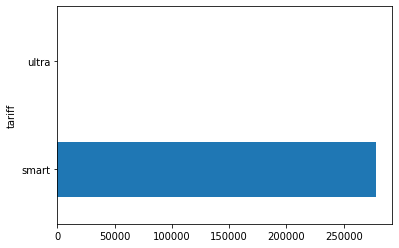

In [29]:
# выручка по длительности звонков (сверх лимита по тарифу)

df.groupby(['tariff'])['rev_calls'].sum().plot.barh(fig)


In [30]:
# проверяем аномальные значения по длительности звонков
display(df.loc[(df['tariff'] == 'smart') &  (df['duration_rounded'] >= 900)].describe())
display(df.loc[(df['tariff'] == 'ultra') &  (df['duration_rounded'] >= 1300)].describe())

,index,user_id,age,month,duration_rounded,calls_cnt,gb_used,msg_cnt,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,rev_calls,rev_int,rev_msg,revenue
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.000000,16.000000,16.000000,16.000000
mean,2406.812500,1315.437500,51.812500,11.125000,1004.812500,128.62500,21.000000,38.625000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1514.437500,1287.500000,23.062500,3375.000000
std,606.181515,138.508228,16.955702,1.204159,132.116221,21.36313,7.164728,30.633043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,396.348663,1324.575404,47.367315,1416.650557
min,1228.000000,1052.000000,21.000000,8.000000,903.000000,105.00000,11.000000,0.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1209.000000,0.000000,0.000000,1765.000000
25%,2043.000000,1225.750000,39.750000,10.000000,930.000000,117.50000,16.000000,14.500000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1290.000000,200.000000,0.000000,2220.000000
50%,2427.500000,1316.000000,54.000000,12.000000,964.500000,126.00000,20.000000,33.500000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1393.500000,1000.000000,0.000000,3143.500000
75%,2996.750000,1452.250000,65.500000,12.000000,1010.750000,134.00000,24.250000,53.500000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1532.250000,1850.000000,10.500000,4147.000000
max,3159.000000,1486.000000,74.000000,12.000000,1435.000000,198.00000,38.000000,104.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,2805.000000,4600.000000,162.000000,6770.000000


,index,user_id,age,month,duration_rounded,calls_cnt,gb_used,msg_cnt,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,rev_calls,rev_int,rev_msg,revenue
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.000000,9.0,9.000000
mean,630.777778,1333.222222,53.000000,8.666667,1414.000000,189.111111,19.888889,65.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,0.0,300.000000,0.0,2250.000000
std,245.842825,112.928935,16.807736,2.958040,134.245112,24.583757,14.581190,53.860932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,636.396103,0.0,636.396103
min,305.000000,1168.000000,25.000000,3.000000,1311.000000,156.000000,3.000000,10.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,0.0,0.000000,0.0,1950.000000
25%,376.000000,1222.000000,44.000000,7.000000,1322.000000,176.000000,5.000000,20.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,0.0,0.000000,0.0,1950.000000
50%,715.000000,1377.000000,59.000000,10.000000,1345.000000,185.000000,23.000000,39.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,0.0,0.000000,0.0,1950.000000
75%,722.000000,1377.000000,66.000000,10.000000,1410.000000,196.000000,28.000000,105.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,0.0,0.000000,0.0,1950.000000
max,959.000000,1474.000000,71.000000,12.000000,1673.000000,244.000000,42.000000,153.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,0.0,1800.000000,0.0,3750.000000


### ПАРАМЕТР КОЛИЧЕСТВО СООБЩЕНИЙ

Стат значения по сообщениям, тариф smart:
 count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: msg_cnt, dtype: float64

Стат значения по звонкам, тариф ultra:
 count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: msg_cnt, dtype: float64


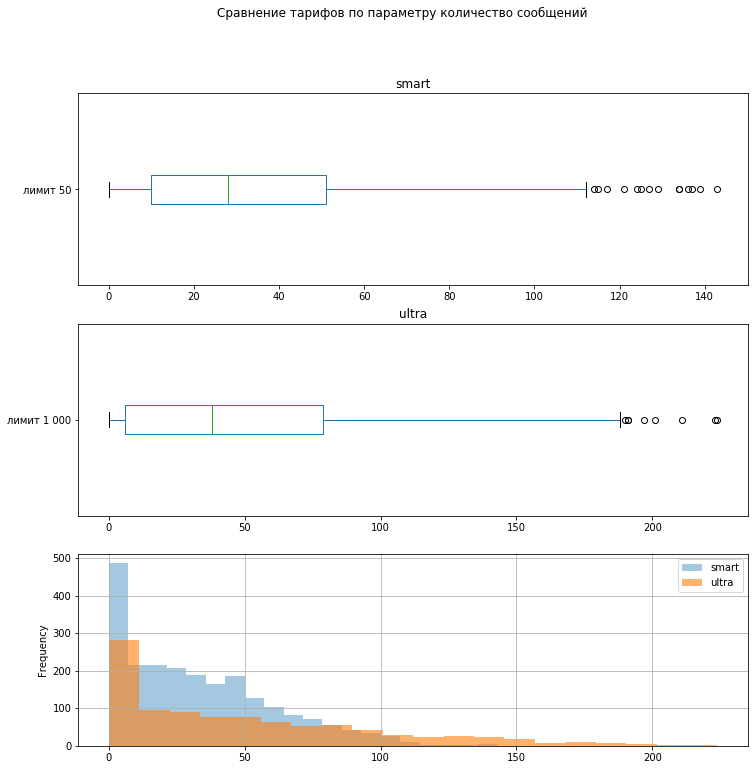

In [31]:
# выводим ститистические значения,
# строим диаграммы размаха и гистограммы по параметру количество сообщений

print("Стат значения по сообщениям, тариф smart:\n", df.loc[(df['tariff'] == 'smart'), 'msg_cnt'].describe())
print()
print("Стат значения по звонкам, тариф ultra:\n", df.loc[(df['tariff'] == 'ultra'), 'msg_cnt'].describe())

fig, axs = plt.subplots(3)
fig.set_figheight(12)
fig.set_figwidth(12)
fig.suptitle('Сравнение тарифов по параметру количество сообщений')

df.loc[(df['tariff'] == 'smart'), 'msg_cnt'].plot(kind='box', vert=False, title = 'smart', ax=axs[0], label = 'лимит 50')
df.loc[(df['tariff'] == 'ultra'), 'msg_cnt'].plot(kind='box',vert=False, title = 'ultra', ax=axs[1], label = 'лимит 1 000')

df.loc[(df['tariff'] == 'smart'), 'msg_cnt'].plot.hist(label='smart', alpha=0.4, bins=20, grid = True).legend()
df.loc[(df['tariff'] == 'ultra'), 'msg_cnt'].plot.hist(label = 'ultra', alpha=0.6, bins=20, grid = True).legend()


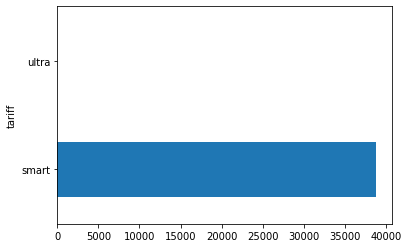

In [32]:
# выручка по количеству сообщений (сверх лимита по тарифу)

df.groupby(['tariff'])['rev_msg'].sum().plot.barh(fig)


In [33]:
# проверяем аномальные значения по количеству сообщений
display(df.loc[(df['tariff'] == 'smart') &  (df['msg_cnt'] >= 110)].describe())
display(df.loc[(df['tariff'] == 'ultra') &  (df['msg_cnt'] >= 170)].describe())

,index,user_id,age,month,duration_rounded,calls_cnt,gb_used,msg_cnt,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,rev_calls,rev_int,rev_msg,revenue
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.000000,19.000000,19.000000,19.000000
mean,2267.842105,1280.894737,36.526316,8.894737,537.473684,75.684211,17.315789,123.684211,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,298.894737,894.736842,221.052632,1964.684211
std,495.908959,110.145305,12.859793,2.492093,189.866728,28.002088,7.318566,11.100814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,371.781133,775.652904,33.302442,1102.806725
min,1226.000000,1052.000000,19.000000,3.000000,234.000000,36.000000,2.000000,110.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,0.000000,0.000000,180.000000,730.000000
25%,2129.500000,1248.500000,25.000000,7.500000,378.000000,49.500000,15.500000,113.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,0.000000,200.000000,189.000000,963.000000
50%,2333.000000,1295.000000,44.000000,9.000000,523.000000,75.000000,20.000000,124.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,69.000000,1000.000000,222.000000,1993.000000
75%,2472.500000,1324.000000,45.000000,11.000000,717.000000,99.000000,22.000000,134.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,651.000000,1400.000000,252.000000,2502.500000
max,3155.000000,1484.000000,55.000000,12.000000,838.000000,117.000000,27.000000,143.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1014.000000,2400.000000,279.000000,4231.000000


,index,user_id,age,month,duration_rounded,calls_cnt,gb_used,msg_cnt,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,rev_calls,rev_int,rev_msg,revenue
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.000000,22.0,22.000000
mean,345.227273,1196.545455,42.045455,10.090909,493.545455,68.363636,28.409091,186.772727,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,0.0,381.818182,0.0,2331.818182
std,167.625413,95.557874,18.193346,1.900103,432.338792,59.851042,8.381721,16.017644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,597.722952,0.0,597.722952
min,15.000000,1004.000000,19.000000,6.000000,0.000000,0.000000,12.000000,170.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,0.0,0.000000,0.0,1950.000000
25%,287.750000,1165.500000,26.250000,9.000000,0.000000,0.000000,22.750000,173.750000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,0.0,0.000000,0.0,1950.000000
50%,397.500000,1231.000000,40.000000,10.500000,640.500000,92.000000,29.500000,182.500000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,0.0,75.000000,0.0,2025.000000
75%,441.750000,1252.000000,63.000000,12.000000,805.250000,109.750000,33.000000,191.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,0.0,450.000000,0.0,2400.000000
max,537.000000,1300.000000,68.000000,12.000000,1213.000000,189.000000,44.000000,224.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,0.0,2100.000000,0.0,4050.000000


### ПАРАМЕТР ИНТЕРНЕТ ТРАФИКА

Стат значения по сообщениям, тариф smart:
 count    2229.000000
mean       16.328847
std         5.747061
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: gb_used, dtype: float64

Стат значения по звонкам, тариф ultra:
 count    985.000000
mean      19.494416
std        9.853511
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: gb_used, dtype: float64


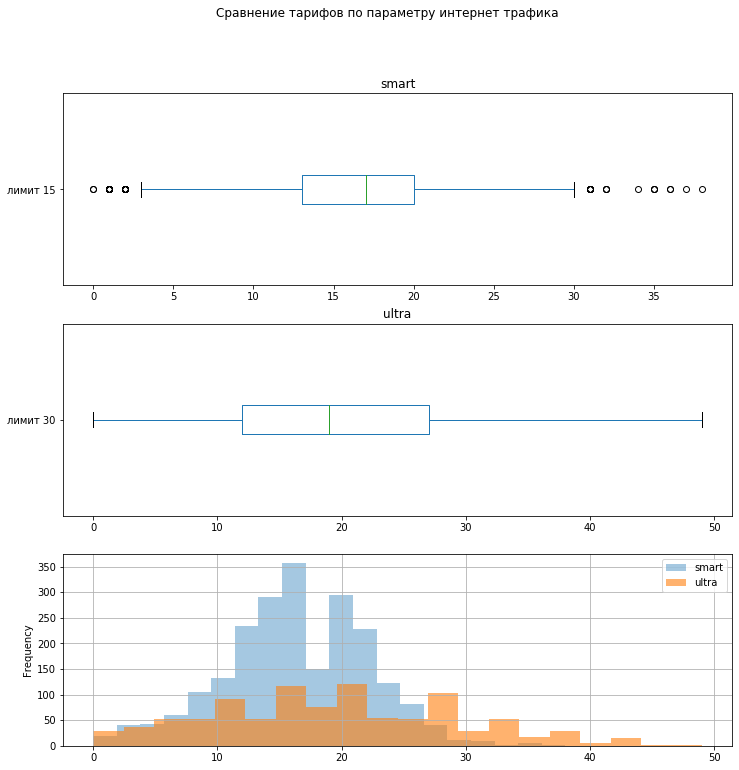

In [34]:
# выводим статистические значения,
# строим диаграммы размаха и гистограммы по параметру интернет трафика
print("Стат значения по сообщениям, тариф smart:\n", df.loc[(df['tariff'] == 'smart'), 'gb_used'].describe())
print()
print("Стат значения по звонкам, тариф ultra:\n", df.loc[(df['tariff'] == 'ultra'), 'gb_used'].describe())


fig, axs = plt.subplots(3)
fig.set_figheight(12)
fig.set_figwidth(12)
fig.suptitle('Сравнение тарифов по параметру интернет трафика')

df.loc[(df['tariff'] == 'smart'), 'gb_used'].plot(kind='box', vert=False, title = 'smart', ax=axs[0], label = 'лимит 15')
df.loc[(df['tariff'] == 'ultra'), 'gb_used'].plot(kind='box',vert=False, title = 'ultra', ax=axs[1], label = 'лимит 30')

df.loc[(df['tariff'] == 'smart'), 'gb_used'].plot.hist(label='smart', alpha=0.4, bins=20, grid = True).legend()
df.loc[(df['tariff'] == 'ultra'), 'gb_used'].plot.hist(label = 'ultra', alpha=0.6, bins=20, grid = True).legend()


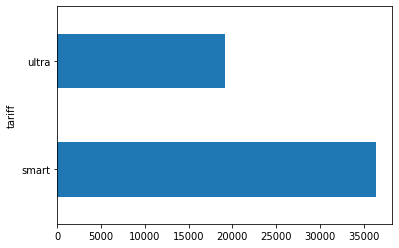

In [35]:
# выручка по длительности звонков (сверх лимита по тарифу)

df.groupby(['tariff'])['gb_used'].sum().plot.barh(fig)


In [36]:
# проверяем аномальные значения по количеству использованию интернет трафика
display(df.loc[(df['tariff'] == 'smart') &  (df['gb_used'] >= 30)].describe())
display(df.loc[(df['tariff'] == 'smart') &  (df['gb_used'] <= 4)].describe())

,index,user_id,age,month,duration_rounded,calls_cnt,gb_used,msg_cnt,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,rev_calls,rev_int,rev_msg,revenue
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.000000,23.000000,23.000000,23.000000
mean,2148.652174,1257.695652,42.130435,10.434783,551.173913,79.478261,32.565217,34.434783,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,371.086957,3513.043478,21.521739,4455.652174
std,613.349049,139.439930,13.253831,2.128296,252.719869,34.259530,2.555317,30.407574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,505.414763,511.063373,43.282234,903.828102
min,1184.000000,1042.000000,19.000000,5.000000,13.000000,2.000000,30.000000,0.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,0.000000,3000.000000,0.000000,3550.000000
25%,1666.500000,1147.500000,36.500000,9.500000,408.000000,64.000000,31.000000,10.500000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,0.000000,3200.000000,0.000000,3754.500000
50%,2178.000000,1261.000000,40.000000,12.000000,541.000000,73.000000,31.000000,25.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,123.000000,3200.000000,0.000000,4011.000000
75%,2618.500000,1369.000000,46.500000,12.000000,736.000000,109.000000,35.000000,50.500000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,708.000000,4000.000000,4.500000,5133.000000
max,3159.000000,1486.000000,71.000000,12.000000,1074.000000,141.000000,38.000000,96.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1722.000000,4600.000000,138.000000,6770.000000


,index,user_id,age,month,duration_rounded,calls_cnt,gb_used,msg_cnt,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,rev_calls,rev_int,rev_msg,revenue
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.000000,76.000000
mean,2178.052632,1265.092105,46.065789,5.828947,83.486842,11.223684,2.473684,6.394737,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,0.0,0.0,2.368421,552.368421
std,652.305202,147.852736,16.366091,3.271649,68.576866,8.500351,1.136940,13.694845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.647416,20.647416
min,995.000000,1005.000000,18.000000,1.000000,2.000000,1.000000,0.000000,0.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,0.0,0.0,0.000000,550.000000
25%,1576.000000,1130.000000,33.000000,2.750000,37.500000,5.000000,1.750000,0.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,0.0,0.0,0.000000,550.000000
50%,2287.500000,1285.000000,46.000000,6.000000,71.000000,10.000000,3.000000,3.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,0.0,0.0,0.000000,550.000000
75%,2692.250000,1388.250000,63.250000,9.000000,105.500000,15.000000,3.000000,7.250000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,0.0,0.0,0.000000,550.000000
max,3212.000000,1499.000000,73.000000,11.000000,407.000000,44.000000,4.000000,110.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,0.0,0.0,180.000000,730.000000


### Выводы

Выборка за 2018 год показывает рост по всем параметрам в сравнении тарифов (smart и ultra) на протяжении 12 месяцев:

* **КО-ВО КЛИЕНТОВ**

>Темп прироста клиентов smart, первое полугодие: 5.37
>Темп прироста клиентов smart, второе полугодие: 1.85
>
>Темп прироста клиентов ultra, первое полугодие: 9.72
>Темп прироста клиентов ultra, второе полугодие: 1.59

**В первом** полугодии количество клиентов тарифа ultra росло быстрее, чем тарифа smart.

**Во втором** полугодии темпы роста снизились, но тариф smart показал лучшую динамику.

* **КОЛ-ВО МИНУТ РАЗГОВОРА**

>Темп прироста минут разговора smart, первое полугодие: 10.60
>Темп прироста минут разговора smart, второе полугодие: 2.19
>
>Темп прироста минут разговора ultra, первое полугодие: 11.67
>Темп прироста минут разговора ultra, второе полугодие: 1.83

**В первом** полугодии количество минут разговора в тарифе ultra росло немного быстрее, чем в тарифе smart.

**Во втором** полугодии темпы роста снизились, но тариф smart показал лучшую динамику.

* **КОЛ-ВО ОТПРАВЛЕННЫХ СООБЩЕНИЙ**

>Темп прироста кол-ва сообщений smart, первое полугодие: 9.89
>Темп прироста кол-ва сообщений smart, второе полугодие: 1.98
>
>Темп прироста кол-ва сообщений ultra, первое полугодие: 13.23
>Темп прироста кол-ва сообщений ultra, второе полугодие: 2.10

**В первом** полугодии количество отправленных сообщений в тарифе ultra росло быстрее, чем в тарифе smart.

**Во втором** полугодии темпы роста снизились, но тариф ultra по прежнему показал лучшую динамику.

* **КОЛ-ВО ИЗРАСХОДОВАННОГО ИНТРНЕТ ТРАФИКА**

>Темп прироста интернет трафика smart, первое полугодие: 9.78
>Темп прироста интернет трафика smart, второе полугодие: 2.11
>
>Темп прироста интернет трафика ultra, первое полугодие: 14.53
>Темп прироста интернет трафика ultra, второе полугодие: 1.75

**В первом** полугодии количество использованного интернет трафика в тарифе ultra росло быстрее, чем в тарифе smart.

**Во втором** полугодии темпы роста снизились, но тариф smart показал лучшую динамику.

Уверенный рост клиентской базы по тарифам свидетельствувет о том, что новые тарифы показались интересными клиентам. При этом ни один тариф не показал "взрывного роста". Тариф smart в результате к концу года привлек 303 клиента, стартовав с 34 в январе, тариф ultra - 130 клиентов, стартовав с 9 в яваре. Интересно, что тренды роста клиентской базы, количества звонков и интернет трафика похожи, при этом отправлять сообщения "больше понравилось" клиентам с тарифом ultra. Можно предположить, что снижение темпов роста во втором полугодии по всем параметрам вызвано выборкой сегмента "новаторов", заинтересовавшихся новым предложением, и жизненный цикл продуктов требует следующих шагов.

Сравнение тарифов по выручке показывает, что средняя выручка по тарифу ultra выше, чем по тарифу smart, но при этом доля тарифа ultra в общей выручке 41%, а в выручке по абонентской плате 61% .

В компонентах выручки по сервисам, клиенты тарифа ultra не вышли за пределы своих лимитов абонентской платы по параметрам длительности звонков и количества сообщений. Тариф оказался "перезаложенным" в своих лимитах по этим параметрам, что может вызвать негативную реакцию у клиентов, переход на другой тариф или уход от оператора.

* **ДЛИТЕЛЬНОСТЬ ЗВОНКОВ**

> smart - лимит   500 мин - медиана 422 мин - среднее 418 мин
>
> ultra - лимит 3 000 мин - медиана 518 мин - среднее 527 мин

Выручка сверх лимита тарифа по сервису звонков в тарифе **smart** составила более 250 т.р., в тарифе **ultra** - 0.
Аномальных значений не было выявлено.

* **КОЛ-ВО СООБЩЕНИЙ**

> smart - лимит    50 - медиана 28 - среднее 33
>
> ultra - лимит 1 000 - медиана 38 - среднее 49

Выручка сверх лимита тарифа по сервису сообщений в тарифе **smart** составила более 360 т.р., в тарифе **ultra** - 0.
Аномальных значений не было выявлено.

* **ИНТЕРНЕТ ТРАФИК** 

По параметру использованного интернет трафика клиенты траифа ultra оказалиь более оптимистичными и тариф показал выручку сверх заложенного лимита приблизительно в 200 т.р.. Выручка по клиентам тарифа smart составила порядка 360 т.р..

> smart - лимит 15 - медиана 17 - среднее 16
>
> ultra - лимит 30 - медиана 19 - среднее 19,5

По выручке, росту клиентской базы, реалистичности установленных лимитов тариф smart показал в 2018 году более перспективный результат. Тариф ultra требует либо корректировки параметров, либо корректировки продвижения, т.к. возможен вариант, что он "не нашел своего клиента".

## Проверка гипотез

На базе предоставленной выборки проверяем гипотезы:

* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [37]:
# гипотеза H0 - средняя выручка пользователей тарифов «Ультра» и «Смарт» равны
# гипотеза H1 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

sample_smart = df.loc[(df['tariff'] == 'smart')]
sample_ultra = df.loc[(df['tariff'] == 'ultra')]

# выводим среднюю выручку по тарифам
print("Среднее значение выручки тарифа smart:", sample_smart['revenue'].mean())
print("Среднее значение выручки тарифа ultra:", sample_ultra['revenue'].mean())
print()

# проверяем гипотезу
alpha = 0.05
results = st.ttest_ind(sample_smart['revenue'], sample_ultra['revenue'], equal_var = False)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

print('p-значение: ', results.pvalue)


Среднее значение выручки тарифа smart: 1289.9735307312696
Среднее значение выручки тарифа ultra: 2070.1522842639592

Отвергаем нулевую гипотезу
p-значение:  4.2606313931076085e-250


### Вывод

Для проверки гипотезы был использован двусторонний тест и порог уровня значимости = 0,05. Полученное значение p, стремящееся к *0*, позволило отвергнуть нулевую гипотезу и принять альтернативную о том, что

> средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Об этом также свидетельстуют расчеты средних значений:

>Среднее значение выручки тарифа smart: 1289.9735307312696
>
>Среднее значение выручки тарифа ultra: 2070.1522842639592

Среднее значение выручки в г. Москва: 1546.7135842880523
Среднее значение выручки в регионах: 1524.9362274298885

Не получилось отвергнуть нулевую гипотезу
p-значение:  0.5440152911670224


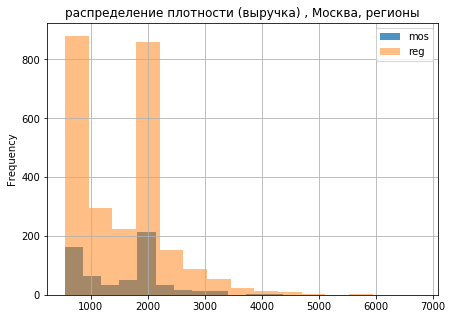

In [41]:
# гипотеза H0 - средняя выручка пользователей из Москвы и из других регионов  равны
# гипотеза H1 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

sample_mos = df.loc[(df['city'] == 'Москва')]
sample_reg = df.loc[(df['city'] != 'Москва')]

# выводим среднюю выручку по тарифам
print("Среднее значение выручки в г. Москва:", sample_mos['revenue'].mean())
print("Среднее значение выручки в регионах:", sample_reg['revenue'].mean())
print()

# строим гистограммы плотности распределения выручки по Москве и регионам
sample_mos['revenue'].plot.hist(title="распределение плотности (выручка) , Москва, регионы", figsize=(7, 5), label = 'mos', alpha=0.8, bins=15, grid = True).legend()
sample_reg['revenue'].plot.hist(figsize=(7, 5), label = 'reg', alpha=0.5, bins=15, grid = True).legend()

# проверяем гипотезу
alpha = 0.05
results = st.ttest_ind(sample_mos['revenue'], sample_reg['revenue'])
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

print('p-значение: ', results.pvalue)


### Вывод

Для проверки гипотезы был использован двусторонний тест и порог уровня значимости = 0,05. Полученное значение p (равно 0,544) позволило принять нулевую гипотезу и отвергнуть альтернативную о том, что

> средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Об отсутствии значимых различий также свидетельствуют расчеты средних значений:

>Среднее значение выручки в г. Москва: 1546.7135842880523
>
>Среднее значение выручки в регионах: 1524.9362274298885

и гистограммы распределения плотности выручки, которые показывают схожее двухмодальное распределение.


In [39]:
# считаем долю тарифов в Москве и регионах
df.groupby(['city'])['revenue'].sum().sort_values(ascending=False)

city
Москва             945042
Санкт-Петербург    436982
Новосибирск        174542
Уфа                145762
Краснодар          132790
                    ...  
Кемерово             9165
Владикавказ          8985
Волжский             6050
Иваново              3900
Химки                3192
Name: revenue, Length: 76, dtype: int64

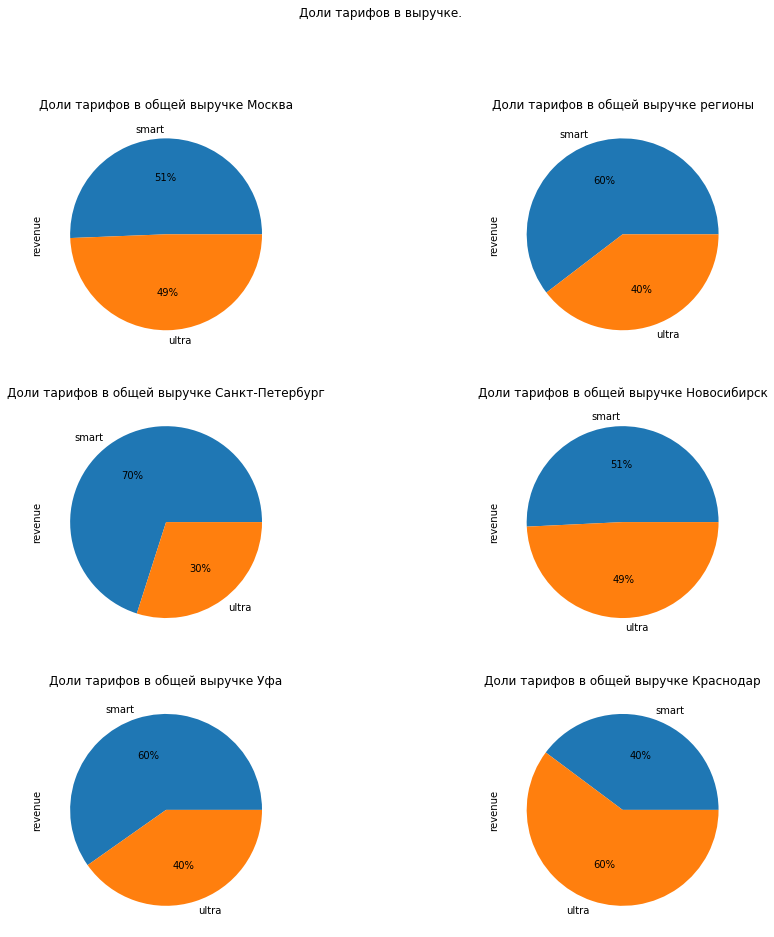

In [40]:
fig, axs = plt.subplots(3,2)
fig.set_figheight(15)
fig.set_figwidth(15)
fig.suptitle('Доли тарифов в выручке.')

plt.subplot(321)
plt.title('Доли тарифов в общей выручке Москва')
df.loc[(df['city'] == 'Москва')].groupby(['tariff'])['revenue'].sum().plot(kind='pie', autopct='%1.0f%%')

plt.subplot(322)
plt.title('Доли тарифов в общей выручке регионы')
df.loc[(df['city'] != 'Москва')].groupby(['tariff'])['revenue'].sum().plot(kind='pie', autopct='%1.0f%%')

plt.subplot(323)
plt.title('Доли тарифов в общей выручке Санкт-Петербург')
df.loc[(df['city'] == 'Санкт-Петербург')].groupby(['tariff'])['revenue'].sum().plot(kind='pie', autopct='%1.0f%%')

plt.subplot(324)
plt.title('Доли тарифов в общей выручке Новосибирск')
df.loc[(df['city'] == 'Новосибирск')].groupby(['tariff'])['revenue'].sum().plot(kind='pie', autopct='%1.0f%%')

plt.subplot(325)
plt.title('Доли тарифов в общей выручке Уфа')
df.loc[(df['city'] == 'Уфа')].groupby(['tariff'])['revenue'].sum().plot(kind='pie', autopct='%1.0f%%')

plt.subplot(326)
plt.title('Доли тарифов в общей выручке Краснодар')
df.loc[(df['city'] == 'Краснодар')].groupby(['tariff'])['revenue'].sum().plot(kind='pie', autopct='%1.0f%%')


## Общий вывод

Выборка, предоставленная для анализа в 5 разных таблицах, не содержала пропусков и дубликатов. Колонки в таблицах были единообразно поименованы и позволили провести объединение таблиц без существенных преобразований.

Для дальнейшего анализа данные были приведены к предложенным правилам тарификации:

* Значения длительности звонков округлены до целого значения в большую сторону.

* Значения использованного интернет трафика пересчитаны из Мб в Гб и округлены до целого значения в большую сторону.

* Из дат оказания услуги извлечен номер месяца оказания услуги.

Объединение таблиц произведено последовательно по ключам 'user_id', 'month' и 'tariff' с помощью метода .merge() и параметра 'outer'. Выручка рассчитана отдельно для каждого типа услуги без учета обонентской платы и совокупно с учетом абонентской платы с добавлением соответствующих колонок. Пропущенные значения как значения по услугам, которыми не воспользовался клиент, заменены на 0. Выявлены и удалены 2 записи, в которых срок жизни клиента составил 5 и 6 дней и клиенты вообще не воспользовались услугами оператора.

Анализ данных выборки показал, что оба тарифа оказались жизнеспособными. Рост происходил равномерно по всем параметрам в обоих тарифах, но с разными абсолютными значениями. Клиентская база тарифа smart выросла к концу года до 303 клиентов, стартовав с 34 в январе, тариф ultra - до 130 клиентов, стартовав с 9 в яваре. К концу года оба тарифа показали снижение темпов роста, что может свидетельствовать выборке сегмента "новаторов", заинтересовавшихся новым предложением, и необходимости предпринимать следующие шаги в рамках жизненного цикла продуктов.
Разбор и анализ параметров сервиса выявил особенности тарифа ultra, которые в последствии могут вызвать неудовлетворенность текущих клиентов, переход на другой тариф или уход от оператора. Лимиты по длительности звонка и количеству сообщений в тарифе ultra оказались "перезаложенными":

* **ДЛИТЕЛЬНОСТЬ ЗВОНКОВ**

> smart - лимит   500 мин - медиана 422 мин - среднее 418 мин
>
> ultra - лимит 3 000 мин - медиана 518 мин - среднее 527 мин

* **КОЛ-ВО СООБЩЕНИЙ**

> smart - лимит    50 - медиана 28 - среднее 33
>
> ultra - лимит 1 000 - медиана 38 - среднее 49

Эта особенность привела к тому, что выручка по тарифу ultra практически сложилась из абонентской платы. Клиенты не выходили из пределов лимита (кроме интернет трафика) и большинство из них далеко не дотягивало до этих лимитов.

> Выручка сверх лимита тарифа по услуге звонков в тарифе **smart** составила более 250 т.р., в тарифе **ultra** - 0.
>
> Выручка сверх лимита тарифа по сервису сообщений в тарифе **smart** составила более 360 т.р., в тарифе **ultra** - 0.
>
> Выручка сверх заложенного лимита по интернет трафику в тарифе **smart** составила более 360 т.р., в тарифе **ultra** - 200 т.р..

По параметру использованного интернет трафика клиенты траифа ultra оказалиь более оптимистичными:

> smart - лимит 15 - медиана 17 - среднее 16
>
> ultra - лимит 30 - медиана 19 - среднее 19,5

В результате анализа средней выручки по тарифам подтвердилось, что что средняя выручка различается в зависимости от тарифа:

>Среднее значение выручки тарифа smart: 1289.9735307312696
>
>Среднее значение выручки тарифа ultra: 2070.1522842639592

Но при этом доля тарифа ultra в общей выручке составляет 41%.

Средняя выручка по г. Москва вне зависимости от тарифа схожа со средней выручкой в регионах:

>Среднее значение выручки в г. Москва: 1546.7135842880523
>
>Среднее значение выручки в регионах: 1524.9362274298885

Но при этом доля трифа ultra в общей выручке Москвы составляет 49%, а в регионах - 40%.

По выручке, росту клиентской базы, реалистичности установленных лимитов тариф smart показал в 2118 году более перспективный результат. Тариф ultra требует либо корректировки параметров в сторону снижения лимитов в рамках обонентской платы, либо корректировки продвижения с точки зрения таргетирования, т.к. возможен вариант, что он "не нашел своего клиента". В качестве рекомендации отделу маркетинга можно предложить обратить внимание на г. Краснодар, который вошел в топ 5 городов по выручке и единственный из этих топ 5, где выручка по тарифу ultra составила больше 50% (60%). На примере Краснодара можно провести опрос удовлетворенности клиентов, чтобы разобраться с их отношением к тарифу ultra, и проверить настройки таргетирования, т.к. если будет приянто решение о продолжении продвижения тарифа, можно на примере Краснодара сделать корректировки целевой аудитории.

